# Chap3 from the book: 'L'apprentissage profond avec Pyhton', François CHOLLET

In [246]:
from keras import models, layers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [247]:
physical_devices = tf.config.list_physical_devices('GPU')
gpu = physical_devices[0]
gpu

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

In [278]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [279]:
train_data.shape, test_data.shape

((25000,), (25000,))

# Data processing

In [280]:
def vectorize_sequences(sequences, dimension=10_000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

In [281]:
X_train = vectorize_sequences(train_data)
X_train.shape

(25000, 10000)

In [282]:
X_test = vectorize_sequences(test_data)
X_test.shape

(25000, 10000)

In [283]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Model

In [284]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10_000, )))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [285]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_133 (Dense)           (None, 16)                160016    
                                                                 
 dense_134 (Dense)           (None, 16)                272       
                                                                 
 dense_135 (Dense)           (None, 16)                272       
                                                                 
 dense_136 (Dense)           (None, 16)                272       
                                                                 
 dense_137 (Dense)           (None, 1)                 17        
                                                                 
Total params: 160,849
Trainable params: 160,849
Non-trainable params: 0
_________________________________________________________________


In [286]:
# validation set
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [287]:
model.compile(
    optimizer="rmsprop",
    loss='mse',
    metrics=['acc']
)

In [288]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1501 - acc: 0.7870 - val_loss: 0.0930 - val_acc: 0.8791
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0700 - acc: 0.9114 - val_loss: 0.0890 - val_acc: 0.8794
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0490 - acc: 0.9373 - val_loss: 0.0857 - val_acc: 0.8862
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0368 - acc: 0.9553 - val_loss: 0.1139 - val_acc: 0.8584
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0316 - acc: 0.9619 - val_loss: 0.0960 - val_acc: 0.8795
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0255 - acc: 0.9701 - val_loss: 0.1003 - val_acc: 0.8761
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0200 - acc: 0.9767 - val_loss: 0.1302 - val_acc: 0.8503
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0206 - a

In [289]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.1331 - acc: 0.8540


[0.1330847293138504, 0.8539999723434448]

# Display performance curves

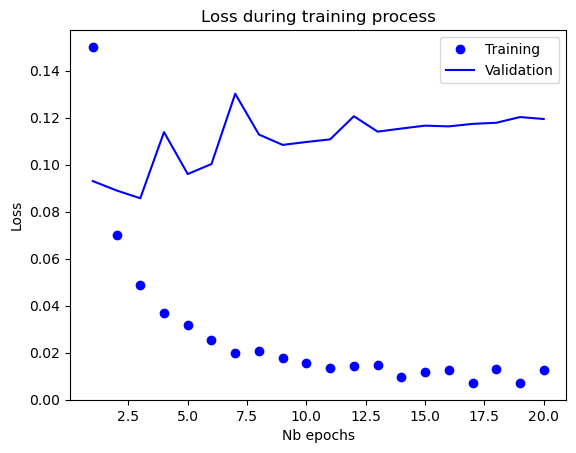

In [290]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label="Training")
plt.plot(epochs, val_loss_values, 'b', label="Validation")

plt.title("Loss during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Loss")
plt.legend()

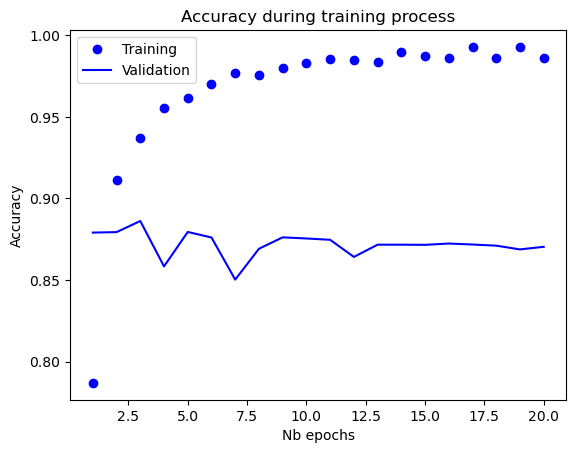

In [291]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, 21)

plt.plot(epochs, acc_values, 'bo', label="Training")
plt.plot(epochs, val_acc_values, 'b', label="Validation")

plt.title("Accuracy during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Accuracy")
plt.legend()

# Stop before overfitting, epoch=4

In [96]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10_000, )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer="rmsprop",
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5025 - accuracy: 0.7694 - val_loss: 0.4224 - val_accuracy: 0.8183
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2766 - accuracy: 0.9052 - val_loss: 0.2867 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2020 - accuracy: 0.9292 - val_loss: 0.3089 - val_accuracy: 0.8740
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1585 - accuracy: 0.9452 - val_loss: 0.2807 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1264 - accuracy: 0.9569 - val_loss: 0.2939 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0947 - accuracy: 0.9720 - val_loss: 0.3171 - val_accuracy: 0.8834
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0783 - accuracy: 0.9753 - val_loss: 0.3626 - val_accuracy: 0.8793
Epoch 8/20
30

In [270]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.1401 - acc: 0.8466


[0.1400899440050125, 0.8465999960899353]